Estimated lambda: 0.4938972466647743


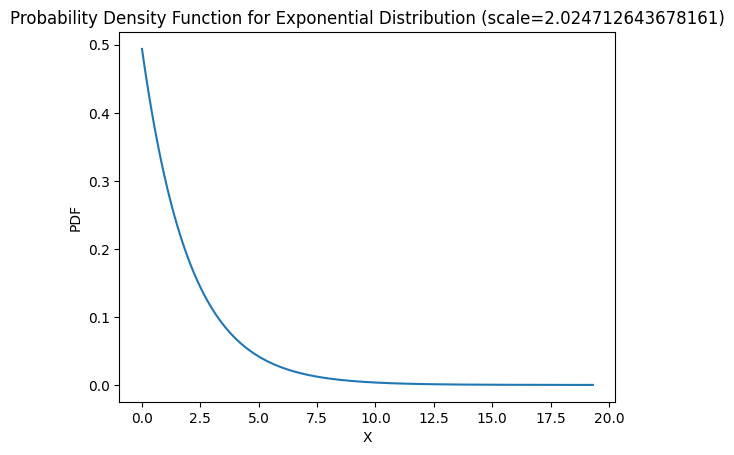

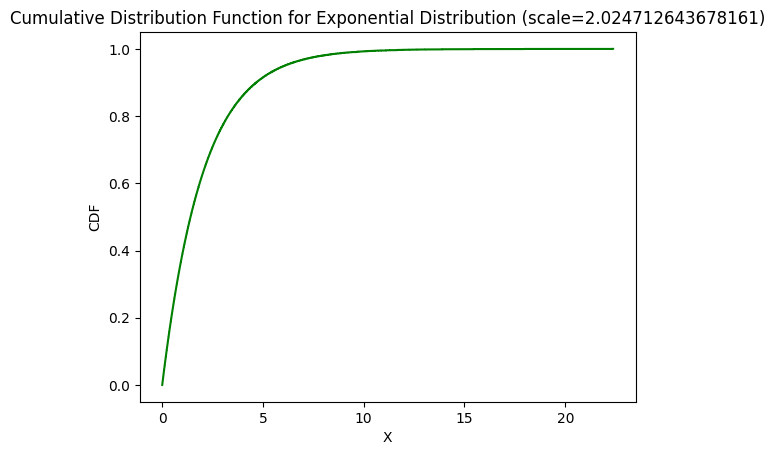

Variance is:  4.1
Expectation is:  2.02


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Probability Density Function (PDF) for exponential distribution
def exponential_pdf(x, scale):
    return stats.expon.pdf(x, scale=scale)

# Cumulative Distribution Function (CDF) for exponential distribution
def exponential_cdf(x, scale):
    return stats.expon.cdf(x, scale=scale)

# Variance of exponential distribution
def exponential_variance(scale):
    return scale**2

def exponential_expectation(lambd):
    if lambd <= 0:
        raise ValueError("Parameter lambda must be greater than 0.")
    
    expectation = 1 / lambd
    return expectation

def plot_exponential_pdf(scale_param, size=10000):
    # Generate a random sample from an exponential distribution
    X = np.random.exponential(scale_param, size=size)

    # Generate values for the PDF curve
    x_pdf = np.linspace(0, max(X), 1000)
    pdf_values = exponential_pdf(x_pdf, scale_param)

    # Plot Probability Density Function (PDF) as a curve and histogram
    plt.plot(x_pdf, pdf_values)
    #plt.hist(X, bins='auto', density=True, alpha=0.5, label='Empirical PDF (Histogram)')
    plt.xlabel('X')
    plt.ylabel('PDF')
    plt.title(f'Probability Density Function for Exponential Distribution (scale={scale_param})')
    plt.show()

def plot_exponential_cdf(scale_param, size=10000):
    # Generate a random sample from an exponential distribution
    X = np.random.exponential(scale_param, size=size)

    # Sort the sample for plotting the empirical CDF
    x_cdf = np.sort(X)
    y_cdf = [exponential_cdf(x, scale_param) for x in x_cdf]

    # Plot Cumulative Distribution Function (CDF)
    plt.step(x_cdf, y_cdf, where='post', color = "green")
    plt.title(f'Cumulative Distribution Function for Exponential Distribution (scale={scale_param})')
    plt.xlabel('X')
    plt.ylabel('CDF')
    plt.show()


#Dataset can be found here: https://github.com/rashida048/Datasets/blob/master/phone_data.csv

"""This applications analyze the pattern of phone calls by observing the time between each call
and creates a model by extracting exponential distribution parameters from the given data so 
we can expect the probability of getting a call after a certain time.
"""
#After performing analysis to the data and taking first week as our range:

# Given data (time differences in minutes)
time_diff = [
    0, 468, 2, 159, 88, 723, 483, 11, 18, 51, 357, 3, 235, 26, 1, 362, 1, 3, 3, 1, 12,
    2, 0, 0, 293, 15, 0, 62, 2, 51, 291, 112, 20, 2, 17, 74, 469, 59, 35, 9, 235, 165,
    0, 252, 1, 258, 1, 258, 10, 95, 0, 252, 11, 95, 29, 1, 557, 306
]

# Convert time differences to hours
time_diff_hours = np.array(time_diff) / 60.0

# Parameters for the exponential distribution
lambda_param = 1 / np.mean(time_diff_hours)
scale_param = 1 / lambda_param

print(f"Estimated lambda: {lambda_param}")

# Call the plotting functions with the estimated lambda
plot_exponential_pdf(1 / lambda_param)
plot_exponential_cdf(1 / lambda_param)



Variance = exponential_variance(scale_param)
Expectation = exponential_expectation(lambda_param)

#printing variance and expectation
print("Variance is: ", round(Variance, 2))
print("Expectation is: ", round(Expectation, 2))